In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/QueryGrosera_v4.csv', encoding= "latin_1")
df

,Reserva,Tipo_Habitacion,Clasificacion_tipo_habitacion,Paquete,Canal,Agencia,Estatus_res,Capacidad_hotel,Numero_personas,Numero_adultos,Numero_men,Numero_noches,Numero_habitaciones,IngresoMto,FechaRegistro,FechaLlegada,FechaSalida
0,6576,ESTD C/BALCON SN12ASB,ASB,WALK IN ...,FAX ...,SUNWING VACATIONS ...,SALIDA,735,1,1,0,1,1,101.60,2019-12-10,2020-01-15,2020-01-16
1,82869,MV LUXURY 1K SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20
2,82868,MV LUXURY 2Q SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,3,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20
3,62469,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,LADA 800 NACIONAL68 ...,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.12,2019-02-22,2019-02-22,2019-02-24
4,63254,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,MULTIVACACIONES 1,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.70,2019-02-12,2019-02-13,2019-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,63042,LUXURY 1K SN12GSU,GSU,WALK IN ...,LADA 800 NACIONAL68 ...,PRICETRAVEL HOLDING ...,RESERVACION EN TRANSICION,735,2,2,0,1,1,132946.80,2019-03-14,2019-03-14,2019-03-14
79982,40799,MASTER SUITE 1KSN12GMS,GMS,WALK IN ...,LADA 800 NACIONAL68 ...,CLIENTES PARTICULARES ...,RESERVACION O (R)REGISTRO,735,2,2,0,28,1,145544.00,2020-03-21,2021-01-13,2021-02-10
79983,60997,MASTER SUITE 1KSN12GMS,GMS,WALK IN ...,LADA 800 NACIONAL68 ...,CLIENTES PARTICULARES ...,SALIDA,735,2,2,0,52,1,166296.00,2019-02-12,2019-02-13,2019-04-06
79984,52804,MASTER SUITE 1KSN12GMS,GMS,WALK IN ...,LADA 800 NACIONAL68 ...,CLIENTES PARTICULARES ...,SALIDA,735,2,2,0,63,1,201474.00,2019-07-17,2020-01-11,2020-03-14


In [2]:
def remove_outliers(df, column_name, threshold=3):
    """
    Remove rows with outliers in a specific column of a DataFrame.
    
    Parameters:
        - df: pandas DataFrame
            The DataFrame containing the data.
        - column_name: str
            The name of the column to check for outliers.
        - threshold: int or float, optional (default=3)
            The number of standard deviations away from the mean to consider as an outlier.
    
    Returns:
        - pandas DataFrame
            The DataFrame with the outliers removed.
    """
    mean = np.mean(df[column_name])
    std = np.std(df[column_name])
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

def is_high_season(date):
    year = date.year
        #verano, asueto revolución, invierno, asueto constitución, asueto petróleo
    if (pd.Timestamp(year=year, month=7, day=17) <= date <= pd.Timestamp(year=year, month=8, day=27)) or \
       (pd.Timestamp(year=year, month=11, day=18) <= date <= pd.Timestamp(year=year, month=11, day=20)) or \
       (pd.Timestamp(year=year, month=12, day=18) <= date <= pd.Timestamp(year=year+1, month=1, day=5)) or \
       (pd.Timestamp(year=year, month=2, day=3) <= date <= pd.Timestamp(year=year, month=2, day=5)) or \
       (pd.Timestamp(year=year, month=3, day=16) <= date <= pd.Timestamp(year=year, month=3, day=18)) or \
        (pd.Timestamp(year=year, month=3, day=25) <= date <= pd.Timestamp(year=year, month=4, day=7)):
        return 'temporada alta'
    return 'temporada baja'

df_no_out = remove_outliers(df, "IngresoMto", threshold=3)

df_no_out['FechaLlegada'] = pd.to_datetime(df_no_out['FechaLlegada'])

df_no_out['Tipo_temporada'] = df_no_out['FechaLlegada'].apply(is_high_season)

df_no_out['Diferencia_reservacion_llegada'] = pd.to_datetime(df_no_out['FechaLlegada']) - pd.to_datetime(df['FechaRegistro'])

df_no_out

C:\Users\oabanderas\AppData\Local\Temp\ipykernel_8784\2719864988.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_out['FechaLlegada'] = pd.to_datetime(df_no_out['FechaLlegada'])
C:\Users\oabanderas\AppData\Local\Temp\ipykernel_8784\2719864988.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_out['Tipo_temporada'] = df_no_out['FechaLlegada'].apply(is_high_season)
C:\Users\oabanderas\AppData\Local\Temp\ipykernel_8784\2719864988.py:42: SettingWithCopyWarning: 
A value is trying to be set on 

,Reserva,Tipo_Habitacion,Clasificacion_tipo_habitacion,Paquete,Canal,Agencia,Estatus_res,Capacidad_hotel,Numero_personas,Numero_adultos,Numero_men,Numero_noches,Numero_habitaciones,IngresoMto,FechaRegistro,FechaLlegada,FechaSalida,Tipo_temporada,Diferencia_reservacion_llegada
0,6576,ESTD C/BALCON SN12ASB,ASB,WALK IN ...,FAX ...,SUNWING VACATIONS ...,SALIDA,735,1,1,0,1,1,101.60,2019-12-10,2020-01-15,2020-01-16,temporada baja,36 days
1,82869,MV LUXURY 1K SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20,temporada baja,89 days
2,82868,MV LUXURY 2Q SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,3,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20,temporada baja,89 days
3,62469,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,LADA 800 NACIONAL68 ...,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.12,2019-02-22,2019-02-22,2019-02-24,temporada baja,0 days
4,63254,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,MULTIVACACIONES 1,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.70,2019-02-12,2019-02-13,2019-02-15,temporada baja,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79212,84742,LUXURY 2Q SN12GSU,GSU,WALK IN ...,INTERNET ...,HOTELES S.A.,SALIDA,735,3,3,0,5,1,26520.15,2019-07-12,2019-07-17,2019-07-22,temporada alta,5 days
79213,55939,LUXURY 2Q SN12GSU,GSU,WALK IN ...,INTERNET ...,HOTELES S.A.,RESERVACION O (R)REGISTRO,735,2,2,0,4,1,26521.04,2020-03-12,2020-12-28,2021-01-01,temporada alta,291 days
79214,1379,LUXURY 2Q SN12GSU,GSU,WALK IN ...,LADA 800 NACIONAL68 ...,PRICETRAVEL HOLDING ...,SALIDA,735,2,2,0,6,1,26527.44,2019-03-19,2019-12-26,2020-01-01,temporada alta,282 days
79215,1378,LUXURY 1K SN12GSU,GSU,WALK IN ...,LADA 800 NACIONAL68 ...,PRICETRAVEL HOLDING ...,SALIDA,735,2,2,0,6,1,26527.56,2019-03-19,2019-12-26,2020-01-01,temporada alta,282 days


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import pandas as pd
import gower
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Asumiendo que df_no_out ya está definido y limpio
columns_to_use = ['Tipo_Habitacion', 'Clasificacion_tipo_habitacion', 'Paquete', 'Canal', 'Estatus_res', 'Capacidad_hotel', 'Numero_personas', 'Numero_adultos', 'Numero_noches', 'IngresoMto', 'Tipo_temporada']
df_selected = df_no_out[columns_to_use]

categorical_features = ['Tipo_Habitacion', 'Clasificacion_tipo_habitacion', 'Paquete', 'Canal', 'Estatus_res', "Tipo_temporada"]
numeric_features = ['Capacidad_hotel', 'Numero_personas', 'Numero_adultos', 'Numero_noches', 'IngresoMto']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocesar los datos
data_transformed = preprocessor.fit_transform(df_selected)


### Utilizando HDBSCAN

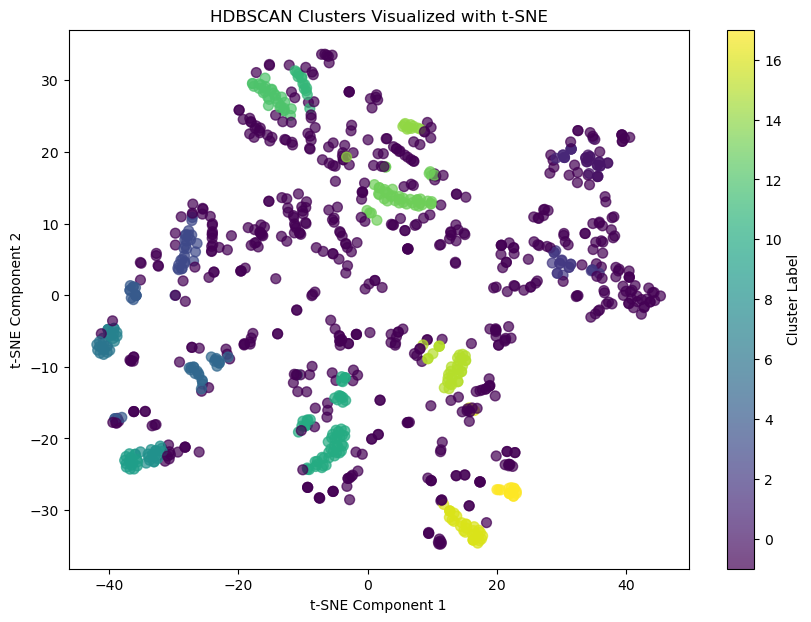

Número de clusters encontrados: 18


In [5]:
import hdbscan
from sklearn.manifold import TSNE

sample_size = 1000
sample_indices = np.random.choice(data_transformed.shape[0], sample_size, replace=False)
sample_data = data_transformed[sample_indices]

# Aplicar HDBSCAN en los datos muestreados
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
labels = clusterer.fit_predict(sample_data)

# Convertir los datos transformados a un DataFrame para agregar las etiquetas de cluster
data_transformed_df = pd.DataFrame(sample_data.toarray(), columns=preprocessor.get_feature_names_out())
data_transformed_df['Cluster'] = labels

# Visualizar los clusters en dos dimensiones usando t-SNE para la visualización
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(sample_data.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('HDBSCAN Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Mostrar el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Número de clusters encontrados: {n_clusters}')

In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluar los índices de Silhouette y Davies-Bouldin
silhouette_avg = silhouette_score(sample_data, labels)
print(f"El índice Silhouette promedio es: {silhouette_avg}")

# Convertir la matriz dispersa a una matriz densa para Davies-Bouldin
data_dense = sample_data.toarray()
db_index = davies_bouldin_score(data_dense, labels)
print(f"El índice Davies-Bouldin es: {db_index}")

El índice Silhouette promedio es: -0.03013504677902449
El índice Davies-Bouldin es: 1.6837824817579359


### Utilizando Gower + Kmeans

In [8]:
# Seleccionar una muestra más pequeña de los datos (por ejemplo, 10,000 filas)
sample_size = 20000
sample_data = df_selected.sample(n=sample_size, random_state=42)

# Calcular la matriz de distancias de Gower
dist_matrix = gower.gower_matrix(sample_data)

# Aplicar K-Means en la matriz de distancias de Gower
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(dist_matrix)
labels = kmeans.labels_

# Evaluar los índices de Silhouette y Davies-Bouldin
silhouette_avg = silhouette_score(dist_matrix, labels, metric="precomputed")
print(f"El índice Silhouette promedio es: {silhouette_avg}")

db_index = davies_bouldin_score(dist_matrix, labels)
print(f"El índice Davies-Bouldin es: {db_index}")


El índice Silhouette promedio es: 0.3095337450504303
El índice Davies-Bouldin es: 1.337387508657892


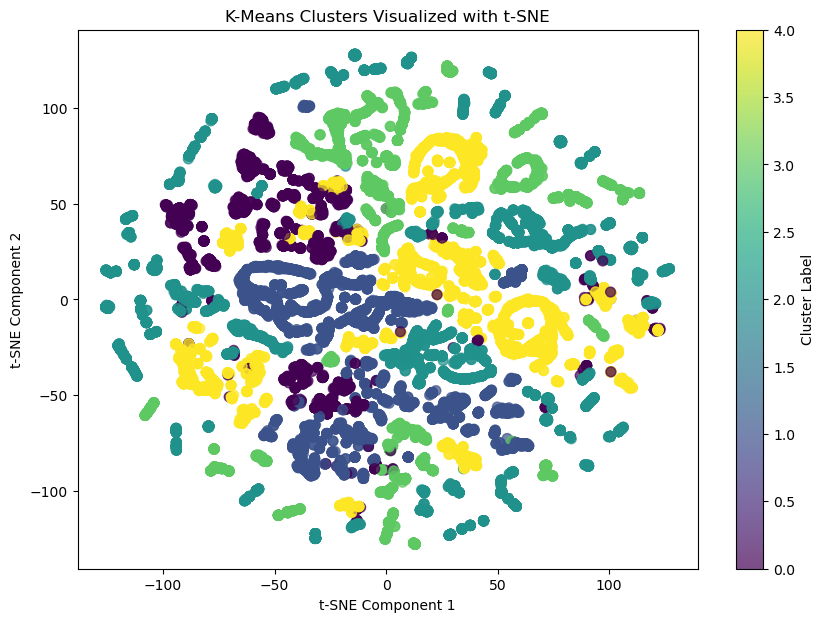

Número de clusters encontrados: 5


In [9]:
# Visualizar los clusters en dos dimensiones usando t-SNE para la visualización
tsne = TSNE(n_components=2, metric="precomputed", init='random', random_state=42)
X_tsne = tsne.fit_transform(dist_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Mostrar el número de clusters encontrados
n_clusters = len(set(labels))
print(f'Número de clusters encontrados: {n_clusters}')